In [65]:
import csv
import numpy as np
import math
from random import randrange
from collections import Counter
from numpy import where
from matplotlib import pyplot
import nltk
import sklearn

# Reading and formatting the dataset

In [2]:
from pathlib import Path
import re

def read_dataset(file_path):
    file_path = Path(file_path)

    raw_text = file_path.read_text().strip()
    raw_docs = raw_text.split('\n')[4:]
#     ids_docs = []
#     keywords_docs = []
#     texts_docs = []
#     labels_docs = []
    ids = []
    keywords = []
    texts = []
    labels = []
    for line in raw_docs:
        
#         for line in doc.split('\n'):
        id_, keyword, text, label = line.split('\t')[0],line.split('\t')[2],line.split('\t')[4],line.split('\t')[5]
        ids.append(id_)
        keywords.append(keyword)
        texts.append(text)
        if(label=='0' or label=='1'):
            labels.append(0)
        else:
            labels.append(1)

    return ids, keywords, texts, labels

In [3]:
IDs,Keywords,Texts,Labels = read_dataset('dontpatronizeme_pcl.tsv')

In [7]:
counter=Counter(Labels)
print(counter)

Counter({0: 9476, 1: 993})


# Pre-Processing

In [47]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
corpus = []
for i in range(len(Texts)):
    review = re.sub('[^a-zA-Z]', ' ', Texts[i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = Labels

# Splitting the Data into Training and Testing Sets equally

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# a) Making use of GaussianNB Classifier

In [56]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred_NB = classifier.predict(X_test)

## Using Confusion or error matrix to know the performance of GaussianNB Classifier

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred_NB, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not PCL','PCL'])

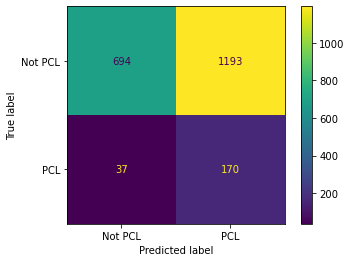

In [60]:
disp.plot()

## Precision, Recall, F1 Score and number of instance for class 0 and 1 respectively using GaussianNB Classifier

In [70]:
sklearn.metrics.precision_recall_fscore_support(y_test,y_pred_NB,average=None)

(array([0.9493844 , 0.12472487]),
 array([0.36777954, 0.82125604]),
 array([0.53017571, 0.21656051]),
 array([1887,  207]))

# b) Making use of Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [75]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [76]:
y_pred_DT = classifier.predict(X_test)

## Using Confusion or error matrix to know the performance of Decision tree

In [77]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

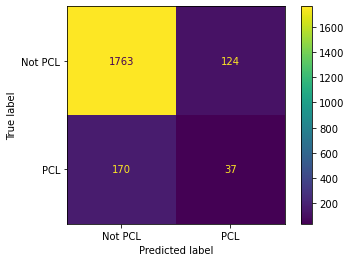

In [82]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT,display_labels=['Not PCL','PCL'])
disp.plot()

## Precision, Recall, F1 Score and number of instance for class 0 and 1 respectively

In [83]:
sklearn.metrics.precision_recall_fscore_support(y_test,y_pred_DT,average=None)

(array([0.9120538 , 0.22981366]),
 array([0.93428723, 0.17874396]),
 array([0.92303665, 0.20108696]),
 array([1887,  207]))

# c) Making use of RandomForest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)

In [87]:
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [88]:
y_pred_RF = classifier.predict(X_test)

## Using Confusion or error matrix to know the performance of RandomForest Classifier

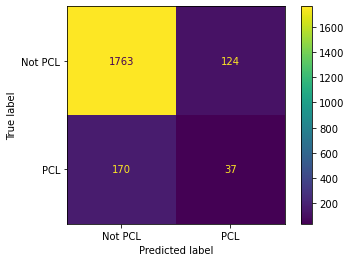

In [89]:
cm_RF = confusion_matrix(y_test, y_pred_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF,display_labels=['Not PCL','PCL'])
disp.plot()

## Precision, Recall, F1 Score and number of instance for class 0 and 1 respectively using RandomForest Classifier

In [90]:
sklearn.metrics.precision_recall_fscore_support(y_test,y_pred_RF,average=None)

(array([0.90229885, 0.5       ]),
 array([0.99841017, 0.01449275]),
 array([0.94792453, 0.02816901]),
 array([1887,  207]))